In [1]:
# Import Libraries

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data

url = 'https://raw.githubusercontent.com/sahil-gidwani/ml/main/datasets/Iris.csv'
iris_data = pd.read_csv(url)

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# if there is any NAN value
iris_data.isnull().values.any()

False

In [6]:
# check the distribution of the class 
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


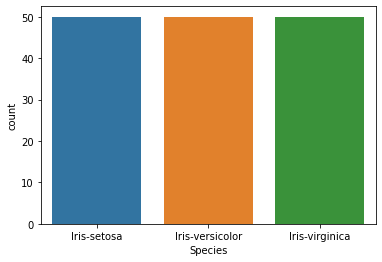

In [7]:
sns.countplot(iris_data['Species'])

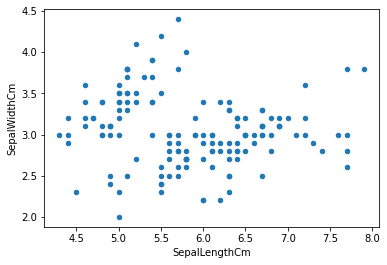

In [8]:
iris_data.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


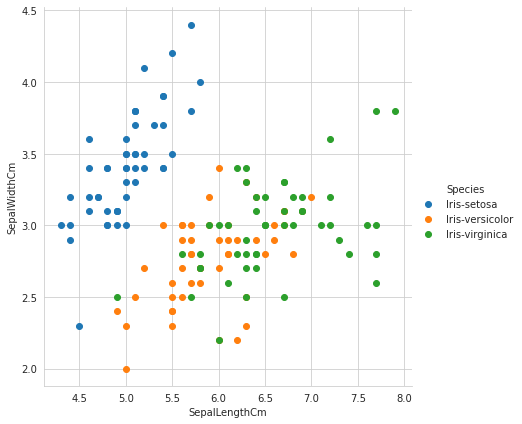

In [9]:
#2--D Plot with colour-coding for each flower type
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='Species', size=6).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


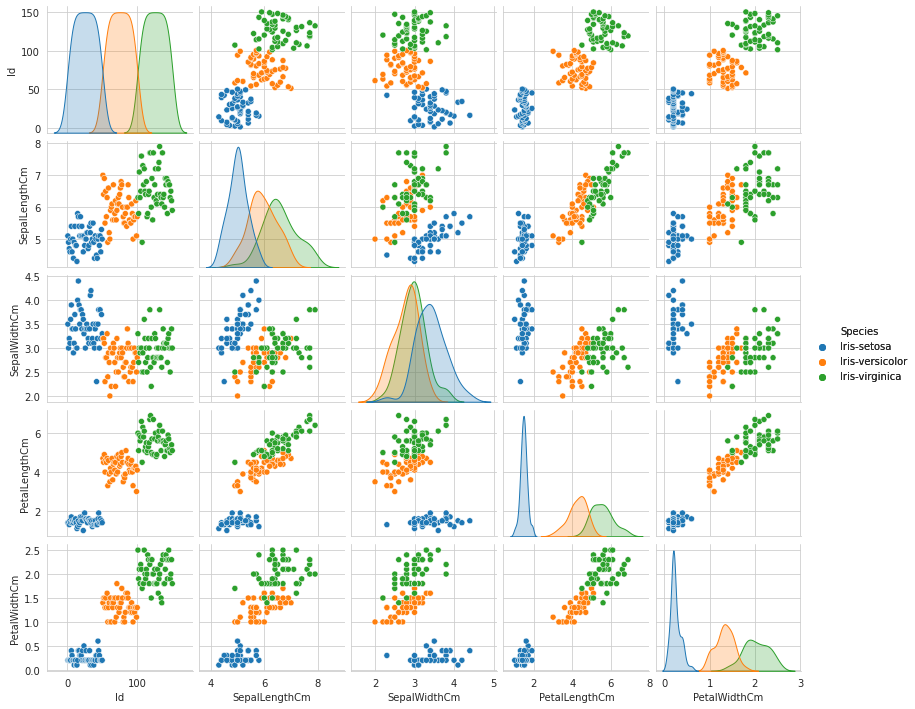

In [10]:
#Pairwise scattter plot: Pair-Plot
sns.pairplot(iris_data, hue='Species', size=2).add_legend()



1.   petal_length and petal_width are the most useful features to identify various flower types.
2.   while Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).



In [11]:
#One Hot Enconding For Different Species // Convert categorical label to numerical

for column in iris_data.columns:
    if iris_data[column].dtype == np.number:
        continue
iris_data[column] = LabelEncoder().fit_transform(iris_data[column])  

<ipython-input-11-6d8005589214>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if iris_data[column].dtype == np.number:


In [12]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [13]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
#seperating Features

x = iris_data.drop(['Species'],axis = 1)
y = iris_data['Species']

In [15]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [17]:
#Splitting Dataset into test and train

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [18]:
#Selecting different Ks in range [1,12] and choose the one with high accuracy

k_range = list(range(1,12))
acc = []
for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

In [19]:
acc

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [20]:
knn = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [21]:
metrics.accuracy_score(y_test, y_pred)

1.0